In [1]:
import numpy as np
import dense_basis as db

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Initialized stellar population with FSPS.


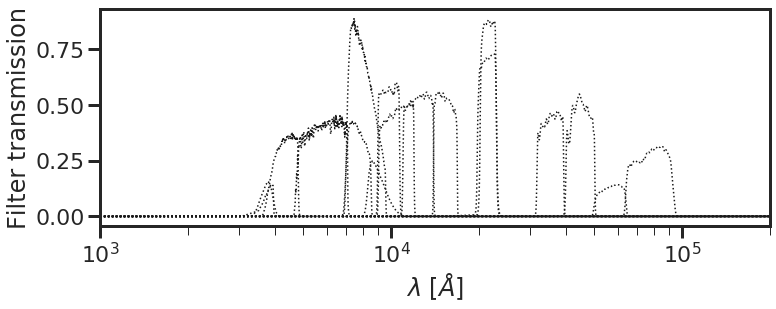

In [2]:
filter_list = 'dense_basis/filters/filter_list_goodss.dat'
db.plot_filterset(filter_list)

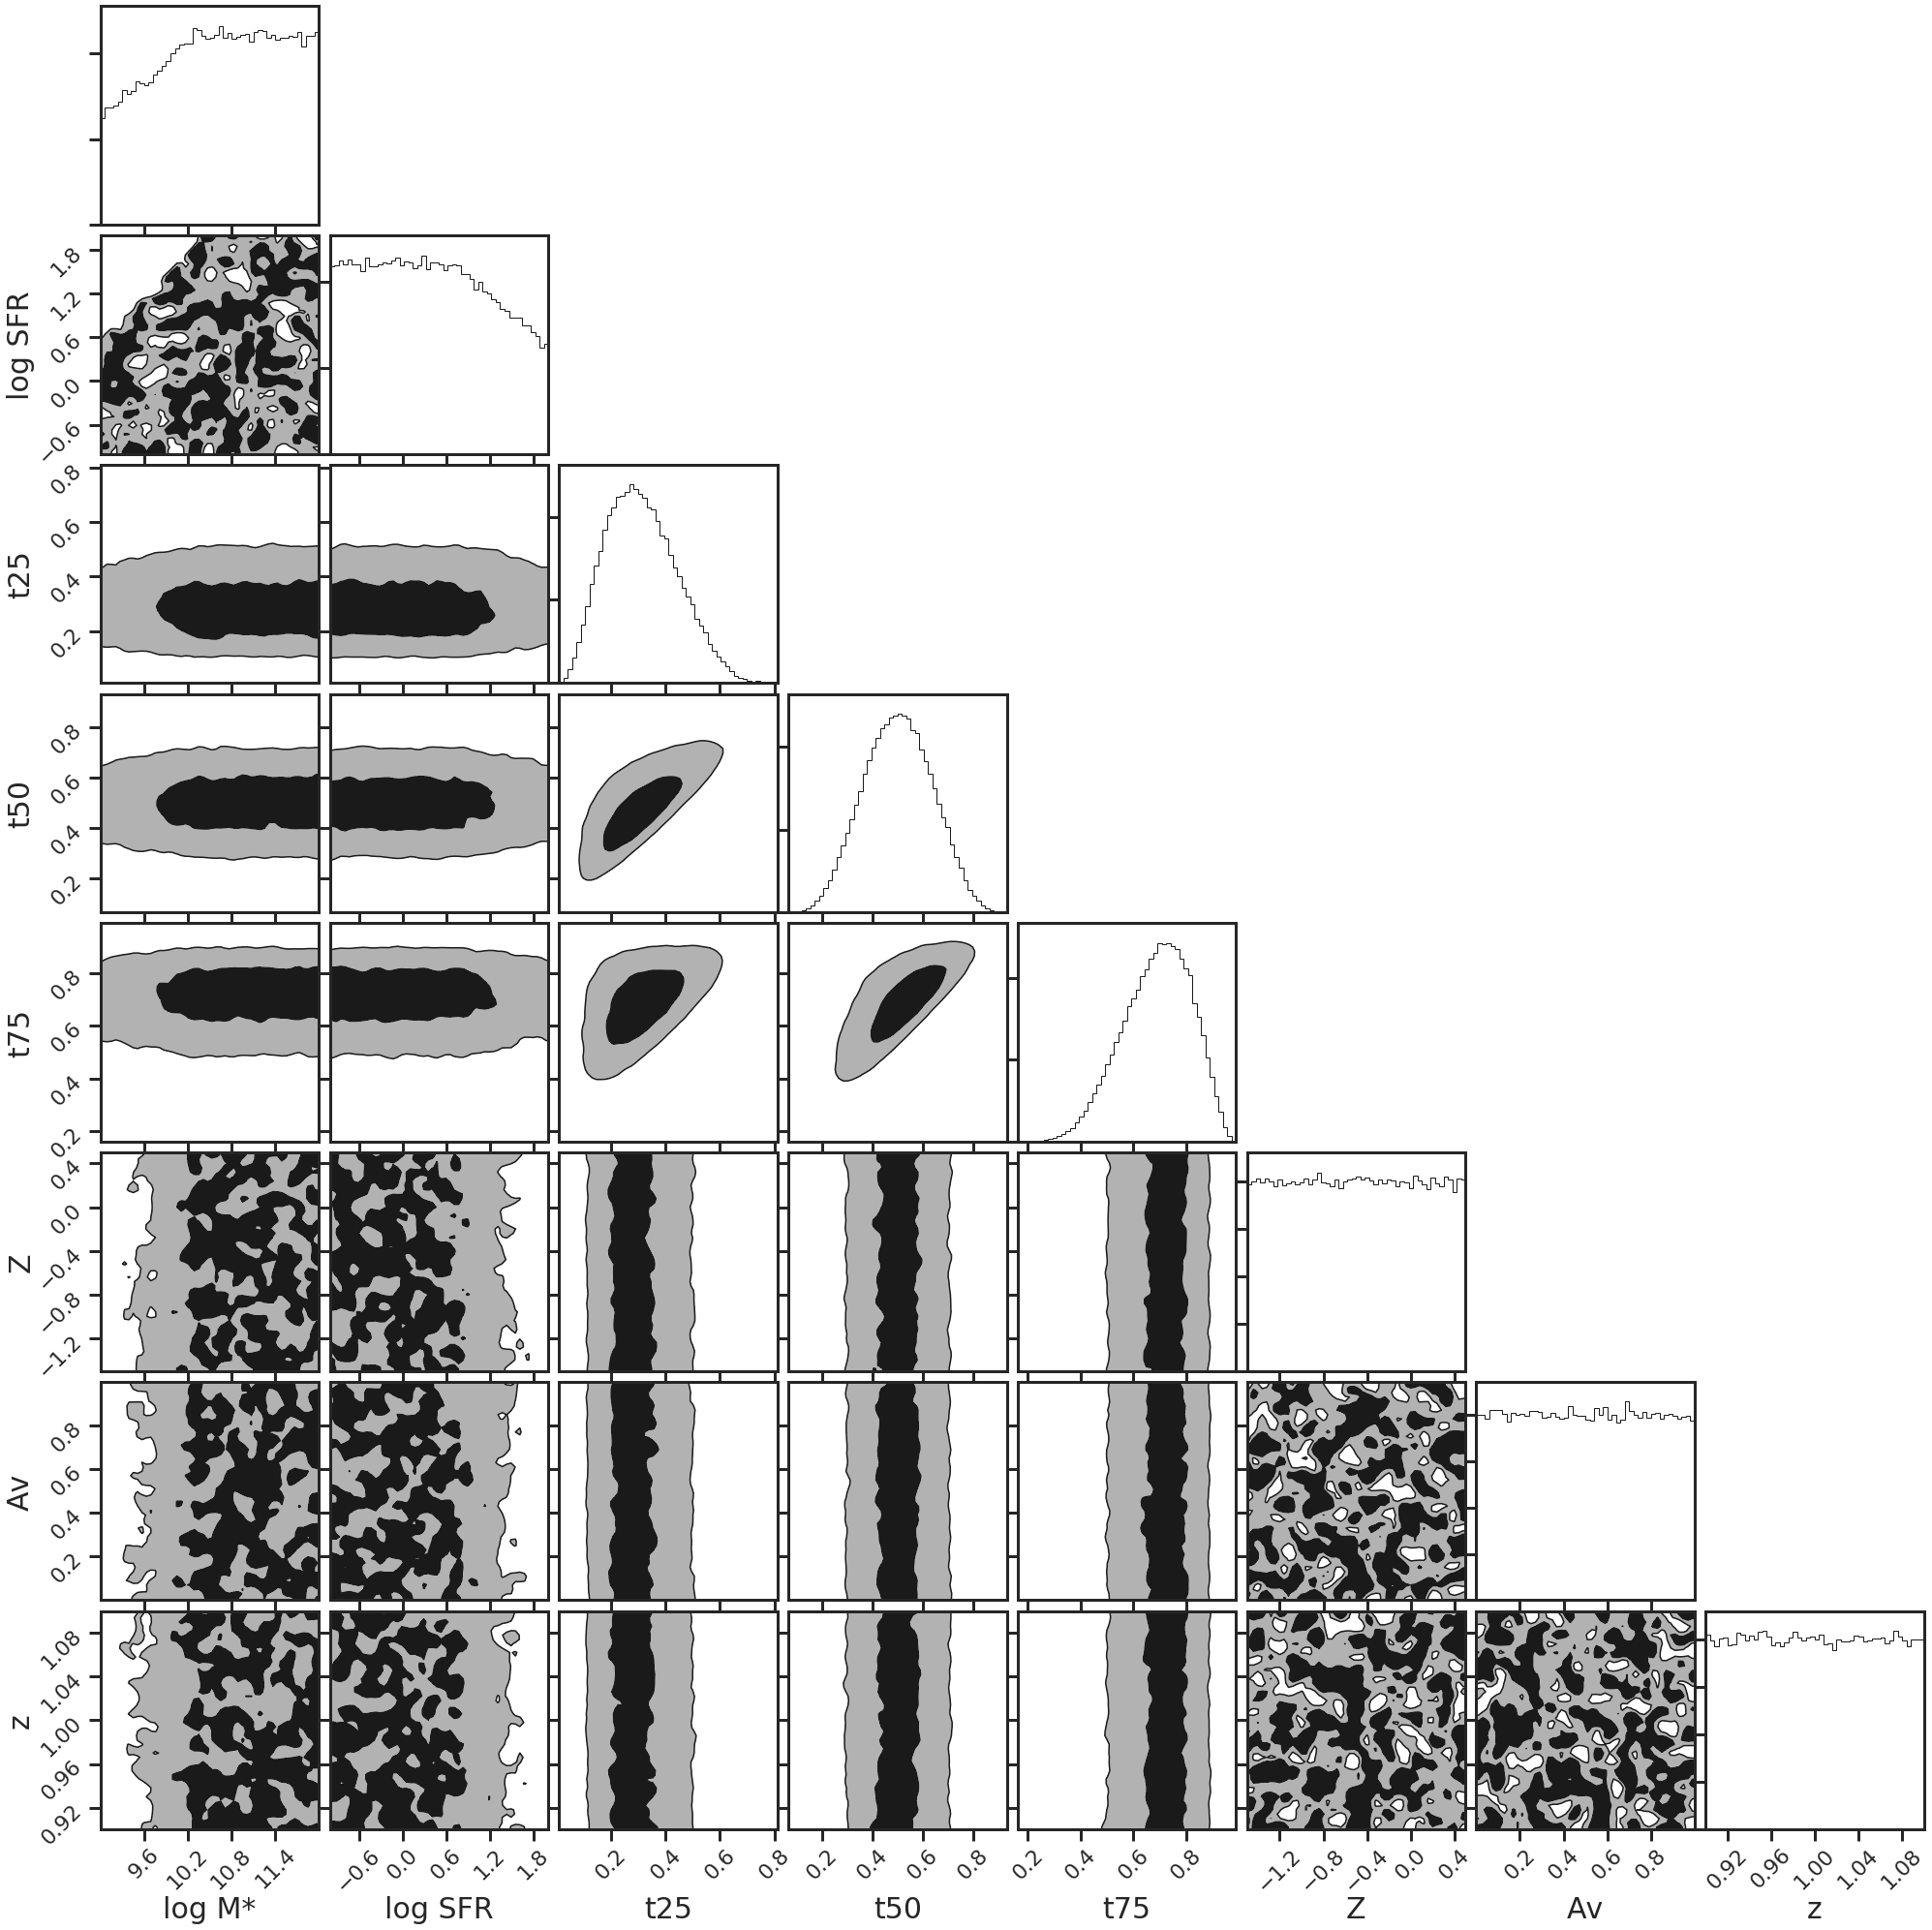

In [4]:
priors = db.Priors()
priors.tx_alpha = 3.0
priors.squeeze_tx = True
priors.plot_prior_distributions()

In [6]:
fname = 'test_atlas'
N_pregrid = 1000
priors.Nparam = 3

In [4]:
fname = 'test_atlas'
N_pregrid = 1000
priors.Nparam = 3
priors.squeeze_tx = True
db.generate_atlas(N_pregrid = N_pregrid, 
                  priors = priors, 
                  fname = fname, store=True, 
                  filter_list = filter_list)

100%|██████████| 1000/1000 [04:15<00:00,  3.92it/s]


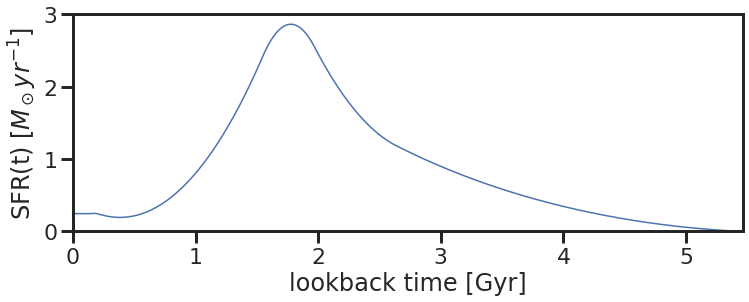

In [8]:
# sample from the prior space to get parameters 
rand_sfh_tuple, rand_Z, rand_Av, rand_z = priors.sample_all_params_safesSFR(random_seed = 5)

# generate an SFH corresponding to the SFH-tuple and see how it looks: 
rand_sfh, rand_time = db.tuple_to_sfh(rand_sfh_tuple, zval = rand_z) 
fig = db.plot_sfh(rand_time, rand_sfh, lookback=True) 
sfh_truths = [rand_time, rand_sfh]

# generate a corresponding spectrum and multiply by filter curves to get the SED: 
_, sfr_true, mstar_true = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_ms = True)
rand_spec, rand_lam = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_lam = True)
obs_sed = db.calc_fnu_sed(rand_spec, rand_z, rand_lam, fkit_name = filter_list) 
obs_err = obs_sed * 0.1 # S/N of 33
sed_truths = (mstar_true, sfr_true, rand_sfh_tuple[3:], rand_Z, rand_Av, rand_z)
sed_truths = np.hstack(sed_truths)

In [9]:
# load the atlas 
pg_sfhs, pg_Z, pg_Av, pg_z, pg_seds, norm_method = db.load_atlas(fname, N_pregrid, priors.Nparam) 
pg_theta = [pg_sfhs, pg_Z, pg_Av, pg_z, pg_seds]

# pass the atlas and the observed SED into the fitter, 
# fit params returns the median and 1-sigma values for the parameters being fit 
fit_params = db.fit_sed_pregrid(obs_sed, obs_err, pg_theta, norm_method=norm_method)

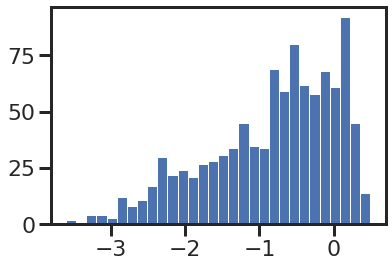

In [9]:
import matplotlib.pyplot as plt
plt.hist(pg_sfhs[1,0:],30)
plt.show()

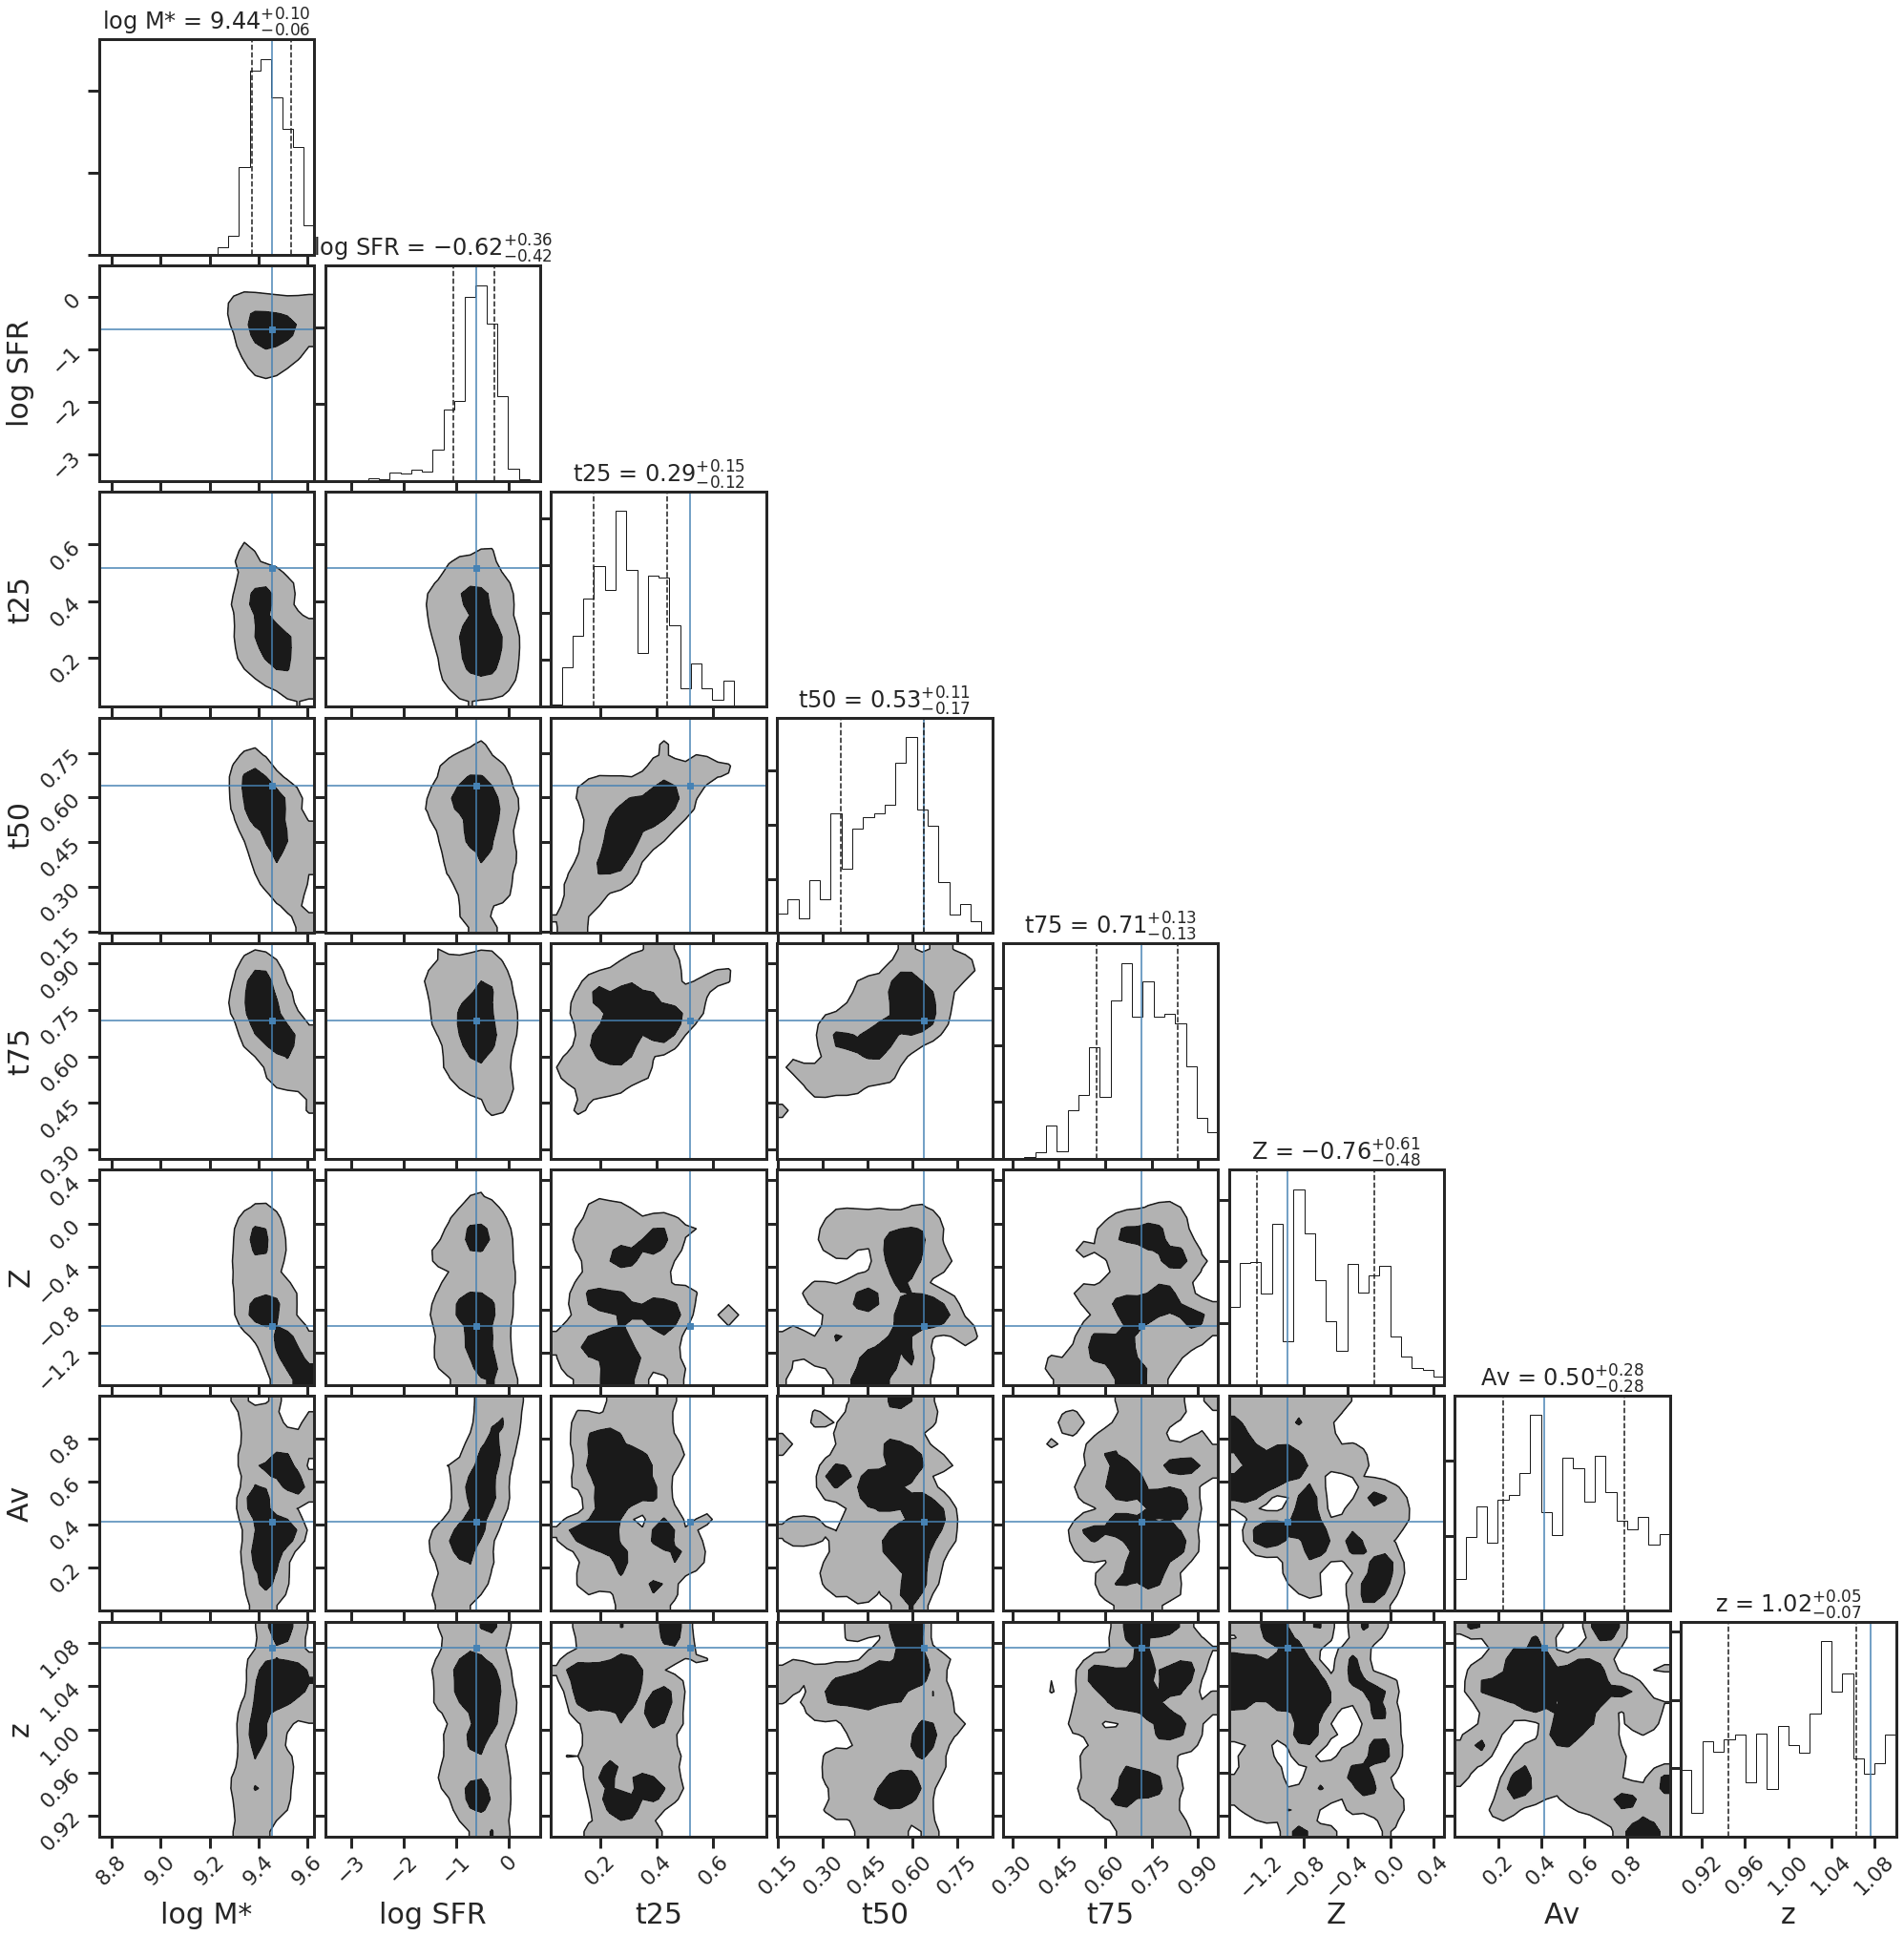

In [10]:
chi2_array = db.fit_sed_pregrid(obs_sed, obs_err,
pg_theta, return_val = 'chi2', norm_method=norm_method)

# plot parameter posteriors: 
db.plot_posteriors(chi2_array, obs_sed, pg_theta, truths = sed_truths)

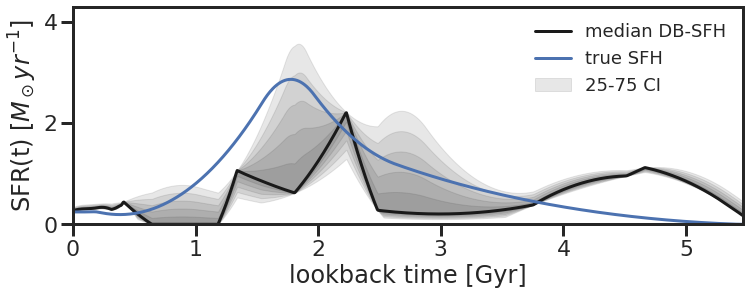

In [14]:
# plot posterior SFH 
db.plot_SFH_posterior(chi2_array, obs_sed, pg_theta, truths = sfh_truths, sfh_threshold = 0.95)

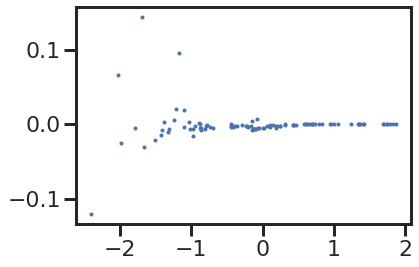

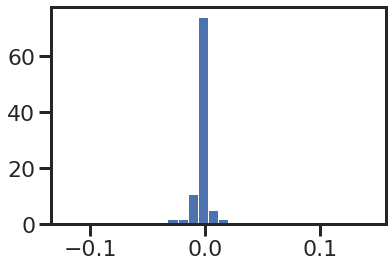

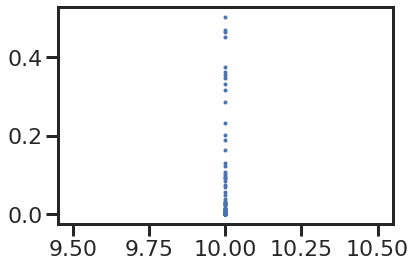

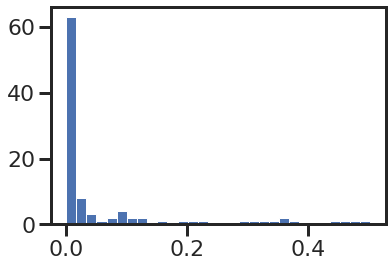

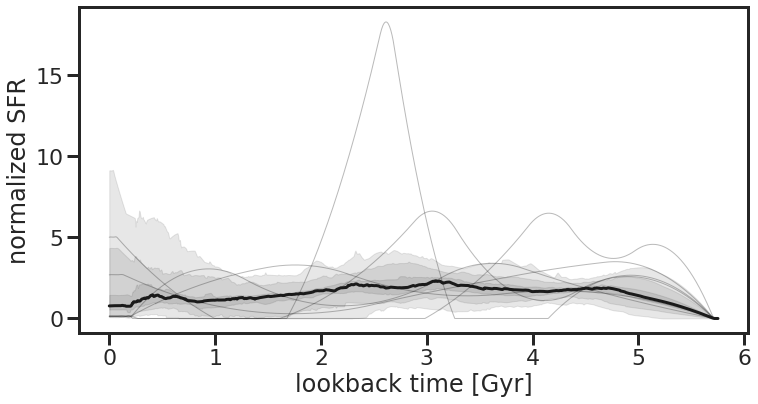

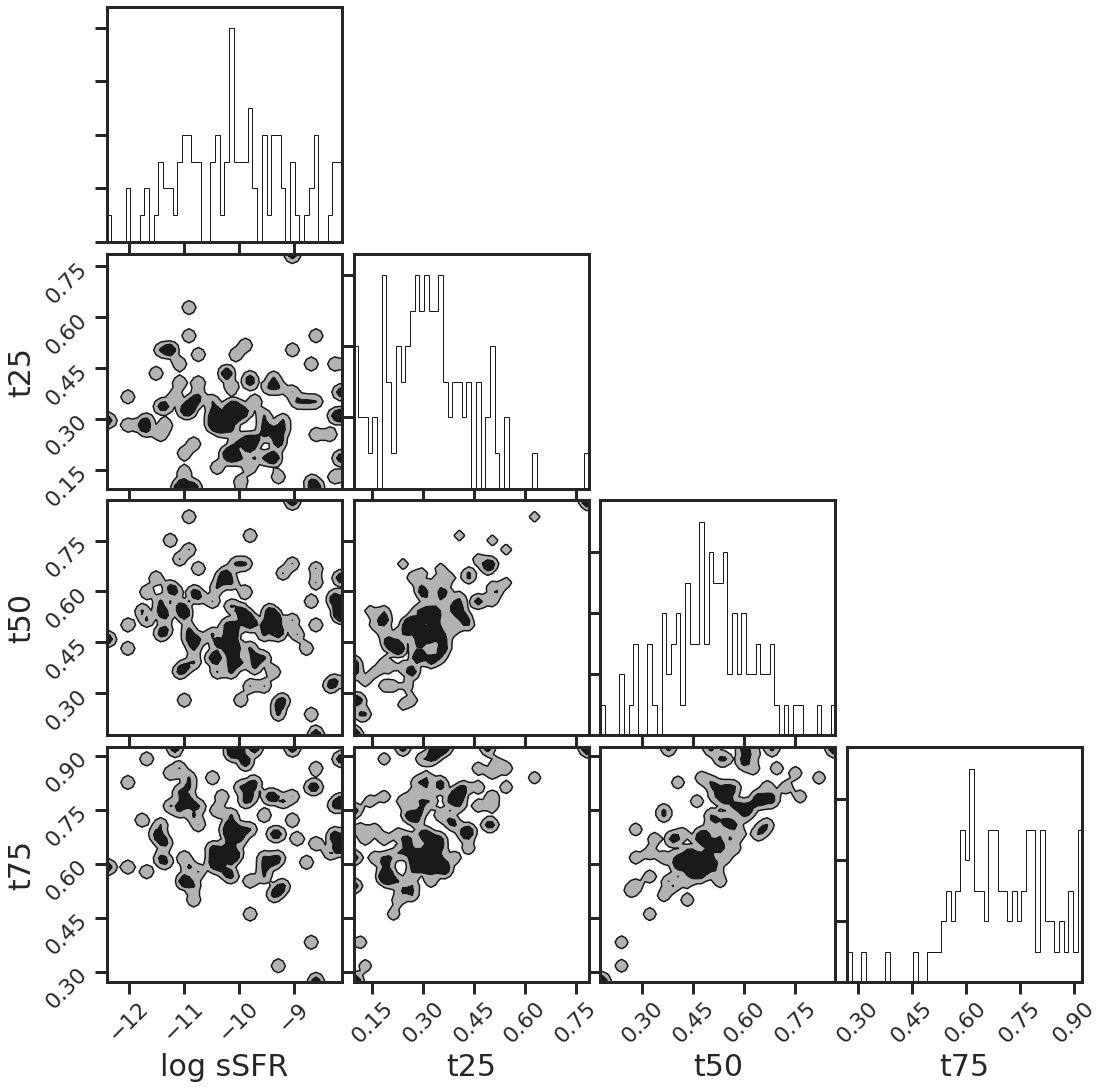

In [10]:
priors.plot_sfh_prior(zval=1.0)

# try a suite of SFH shapes to see how they're reconstructed:

In [15]:
pg_sfhs, pg_Z, pg_Av, pg_z, pg_seds, norm_method = db.load_atlas(fname, N_pregrid, priors.Nparam) 
pg_theta = [pg_sfhs, pg_Z, pg_Av, pg_z, pg_seds]

---------- rising_sfh ------------


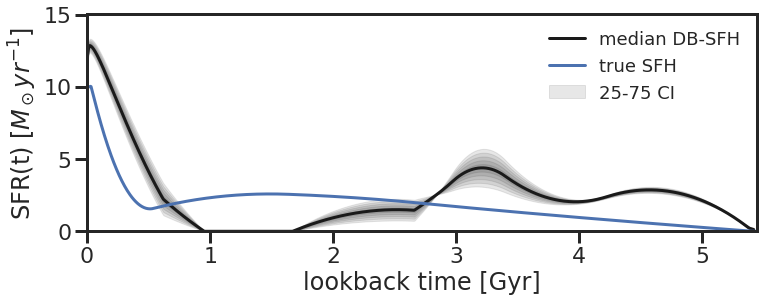

---------- regular_sfg_sfh ------------


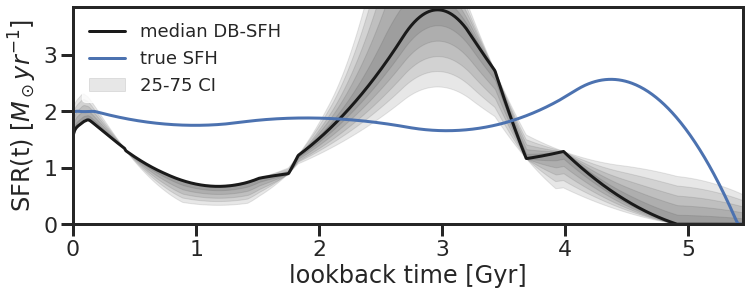

---------- young_quenched_sfh ------------


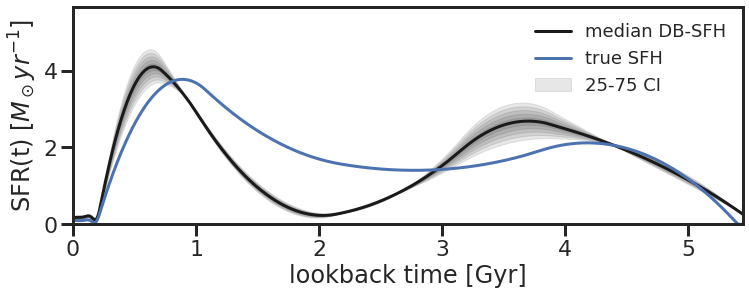

---------- old_quenched_sfh ------------


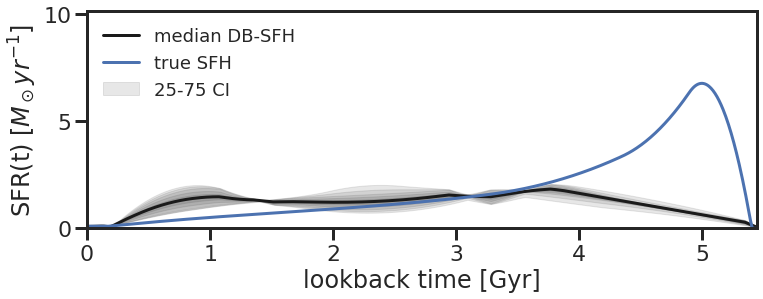

---------- old_very_quenched_sfh ------------


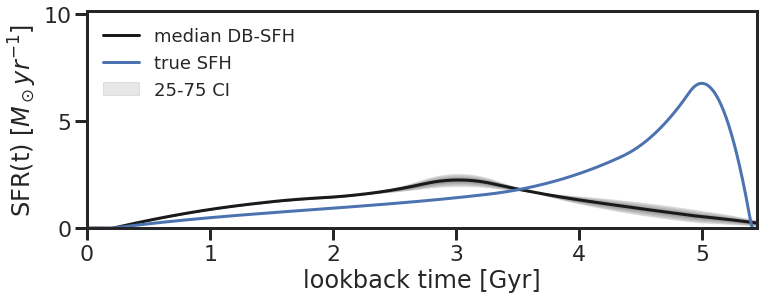

---------- double_peaked_SF_sfh ------------


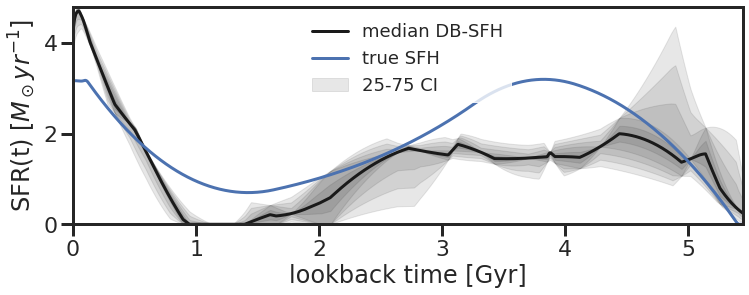

---------- double_peaked_Q_sfh ------------


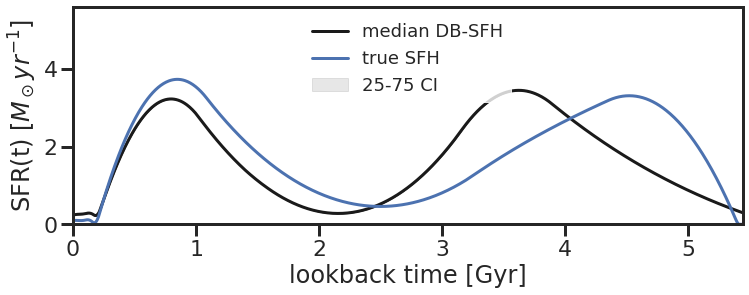

In [16]:
rising_sfh = np.array([10.0,1.0,3,0.5,0.7,0.9])
regular_sfg_sfh = np.array([10.0,0.3,3,0.25,0.5,0.75])
young_quenched_sfh = np.array([10.0,-1.0,3,0.3,0.6,0.8])
old_quenched_sfh = np.array([10.0,-1.0,3,0.1,0.2,0.4])
old_very_quenched_sfh = np.array([10.0,-10.0,3,0.1,0.2,0.4])
double_peaked_SF_sfh = np.array([10.0,0.5,3,0.25,0.4,0.7])
double_peaked_Q_sfh = np.array([10.0,-1.0,3,0.2,0.4,0.8])

sfh_list = [rising_sfh, regular_sfg_sfh, young_quenched_sfh, old_quenched_sfh, old_very_quenched_sfh, double_peaked_SF_sfh, double_peaked_Q_sfh]
sfh_names = ['rising_sfh', 'regular_sfg_sfh', 'young_quenched_sfh', 'old_quenched_sfh', 'old_very_quenched_sfh', 'double_peaked_SF_sfh', 'double_peaked_Q_sfh']

for i in range(len(sfh_list)):

    print('---------- '+sfh_names[i]+' ------------')
    # sample from the prior space to get other parameters, manually setting the SFH
    rand_sfh_tuple, rand_Z, rand_Av, rand_z = priors.sample_all_params_safesSFR(random_seed = 7)
    rand_sfh_tuple = sfh_list[i]

    # generate an SFH corresponding to the SFH-tuple and see how it looks: 
    rand_sfh, rand_time = db.tuple_to_sfh(rand_sfh_tuple, zval = rand_z) 
    # fig = db.plot_sfh(rand_time, rand_sfh, lookback=True) 
    sfh_truths = [rand_time, rand_sfh]

    # generate a corresponding spectrum and multiply by filter curves to get the SED: 
    _, sfr_true, mstar_true = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_ms = True)
    rand_spec, rand_lam = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_lam = True)
    obs_sed = db.calc_fnu_sed(rand_spec, rand_z, rand_lam, fkit_name = filter_list) 
    obs_err = obs_sed * 0.1 # S/N of 33
    sed_truths = (mstar_true, sfr_true, rand_sfh_tuple[3:], rand_Z, rand_Av, rand_z)
    sed_truths = np.hstack(sed_truths)

    chi2_array = db.fit_sed_pregrid(obs_sed, obs_err,
    pg_theta, return_val = 'chi2', norm_method=norm_method)

    db.plot_SFH_posterior(chi2_array, obs_sed, pg_theta, truths = sfh_truths, sfh_threshold = 0.9)

# see if emcee does better.

In [ ]:
import emcee
import corner
from scipy.interpolate import NearestNDInterpolator

 53%|█████▎    | 528/1000 [04:10<00:36, 12.99it/s]

In [ ]:
pg_sfhs, pg_Z, pg_Av, pg_z, pg_seds, norm_method = db.load_atlas(fname, 300000, priors.Nparam) 
pg_theta = [pg_sfhs, pg_Z, pg_Av, pg_z, pg_seds]
pg_params = np.vstack([pg_sfhs[0,0:], pg_sfhs[1,0:], pg_sfhs[3:,0:], pg_Z, pg_Av, pg_z])

def make_sed_from_pregrid(theta, pg_theta, pg_seds):
    interpolator = NearestNDInterpolator(pg_params.T, pg_seds.T)
    sed = interpolator(theta)
    return sed

In [ ]:
example_theta = np.array([10.0,1.0,3,0.5,0.7,0.9,0.2,0.08,1.0])
example_sed = make_sed_from_pregrid(example_theta, pg_theta, pg_seds)
example_sed

In [ ]:
ndim, nwalkers, nsteps = 6, 1000, 1000

# mass, sfr, t50, 
# pos_min = np.array([7.24, -1.0, 0.1, -1.0, 0.0])
# pos_max = np.array([12.0, 1.0, 0.9, 0.5, 0.5])

# psize = pos_max - pos_min
# pos = [pos_min + psize*np.random.rand(ndim) for i in range(nwalkers)]

pos = pg_params[0:,np.random.choice(pg_params.shape[1], size = nwalkers)].T

fig = corner.corner(pos, labels = ['log M*', 'log SFR', 't50', 'met', 'dust','redshift'], 
                    truths = [rand_sfh_tuple[0], rand_sfh_tuple[1], rand_sfh_tuple[3], rand_Z, rand_Av,rand_z])
fig.set_size_inches(12,12)
plt.show()

In [47]:
rising_sfh = np.array([10.0,1.0,3,0.5,0.7,0.9])
regular_sfg_sfh = np.array([10.0,0.3,3,0.25,0.5,0.75])
young_quenched_sfh = np.array([10.0,-1.0,3,0.3,0.6,0.8])
old_quenched_sfh = np.array([10.0,-1.0,3,0.1,0.2,0.4])
old_very_quenched_sfh = np.array([10.0,-10.0,3,0.1,0.2,0.4])
double_peaked_SF_sfh = np.array([10.0,0.5,3,0.25,0.4,0.7])
double_peaked_Q_sfh = np.array([10.0,-1.0,3,0.2,0.4,0.8])

In [252]:
import george
from george import kernels
from scipy.optimize import minimize
from scipy.interpolate import PchipInterpolator, interp1d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel, ConstantKernel as C, DotProduct, RationalQuadratic, Matern

def neg_ln_like(p, gp, y):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p, gp, y):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

In [256]:
def gp_interpolator(x,y,res = 1000, Nparam = 3):
    
    yerr = np.zeros_like(y)
    yerr[2:(2+Nparam)] = 0.001/np.sqrt(Nparam)
    if len(yerr) > 26:
        yerr[2:(2+Nparam)] = 0.1/np.sqrt(Nparam)

    #kernel = np.var(yax) * kernels.ExpSquaredKernel(np.median(yax)+np.std(yax))
    #k2 = np.var(yax) * kernels.LinearKernel(np.median(yax),order=1)
    #kernel = np.var(y) * kernels.Matern32Kernel(np.median(y)) #+ k2
    kernel = np.var(y) * (kernels.Matern32Kernel(np.median(y)) + kernels.LinearKernel(np.median(y), order=2))
    gp = george.GP(kernel)

    #print(xax.shape, yerr.shape)

    gp.compute(x.ravel(), yerr.ravel())

    x_pred = np.linspace(np.amin(x), np.amax(x), res)
    y_pred, pred_var = gp.predict(y.ravel(), x_pred, return_var=True)
    return x_pred, y_pred

def gp_sklearn_interpolator(x,y,res = 1000):
    
    kernel = DotProduct(10.0, (1e-2,1e2)) *RationalQuadratic(0.1)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gp.fit(x.reshape(-1,1),(y-x).reshape(-1,1))

    x_pred = np.linspace(0,1,1000)
    y_pred, sigma = gp.predict(x_pred[:,np.newaxis], return_std=True)
    y_pred = y_pred.ravel() + x_pred

    return x_pred, y_pred

def linear_interpolator(x,y,res = 1000):
    
    interpolator = interp1d(x,y)
    x_pred = np.linspace(np.amin(x), np.amax(x), res)
    y_pred = interpolator(x_pred)
    
    return x_pred, y_pred

def Pchip_interpolator(x,y,res = 1000):
    
    interpolator = PchipInterpolator(x,y)
    x_pred = np.linspace(np.amin(x), np.amax(x), res)
    y_pred = interpolator(x_pred)
    
    return x_pred, y_pred
    

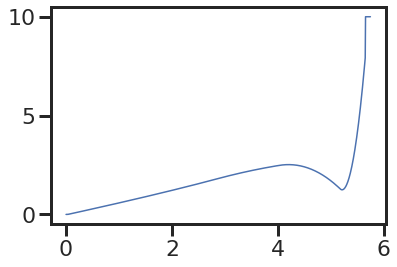

In [262]:
def tuple_to_sfh(sfh_tuple, zval, interpolator = 'gp_george', set_sfr_100Myr = False, vb = False):
    # generate an SFH from an input tuple (Mass, SFR, {tx}) at a specified redshift
    
    
    Nparam = sfh_tuple[2]
    mass_quantiles = np.linspace(0,1,Nparam+2)
    time_quantiles = np.zeros_like(mass_quantiles)
    time_quantiles[-1] = 1
    time_quantiles[1:-1] = sfh_tuple[3:]

    # now add SFR constraints
    
    # SFR smoothly increasing from 0 at the big bang
    mass_quantiles = np.insert(mass_quantiles,1,[0.00])
    time_quantiles = np.insert(time_quantiles,1,[0.01])
    
    # SFR constrained to SFR_inst at the time of observation
    SFH_constraint_percentiles = np.array([0.96,0.97,0.98,0.99])
    for const_vals in SFH_constraint_percentiles:
        
        delta_mstar = 10**(sfh_tuple[0]) *(1-const_vals)
        delta_t = 1 - delta_mstar/(10**sfh_tuple[1])/(cosmo.age(zval).value*1e9)
        
        if (delta_t > time_quantiles[-2]) & (delta_t > 0.9):
            mass_quantiles = np.insert(mass_quantiles, -1, [const_vals], )
            time_quantiles = np.insert(time_quantiles, -1, [delta_t],)
        else:
            delta_m = 1 - ((cosmo.age(zval).value*1e9)*(1-const_vals)*(10**sfh_tuple[1]))/(10**sfh_tuple[0])
            time_quantiles = np.insert(time_quantiles, -1, [const_vals]) 
            mass_quantiles=  np.insert(mass_quantiles, -1, [delta_m])
    
    if interpolator == 'gp_george':
        time_arr_interp, mass_arr_interp = gp_interpolator(time_quantiles, mass_quantiles, Nparam = int(Nparam))
    elif interpolator == 'gp_sklearn':
        time_arr_interp, mass_arr_interp = gp_sklearn_interpolator(time_quantiles, mass_quantiles)
    elif interpolator == 'linear':
        time_arr_interp, mass_arr_interp = linear_interpolator(time_quantiles, mass_quantiles)
    elif interpolator == 'pchip':
        time_arr_interp, mass_arr_interp = Pchip_interpolator(time_quantiles, mass_quantiles)
    else:
        raise Exception('specified interpolator does not exist: {}. \n use one of the following: gp_george, gp_sklearn, linear, and pchip '.format(interpolator))
    
    sfh_scale = 10**(sfh_tuple[0])/(cosmo.age(zval).value*1e9/1000)
    sfh = np.diff(mass_arr_interp)*sfh_scale
    sfh[sfh<0] = 0
    sfh = np.insert(sfh,0,[0])
    if set_sfr_100Myr == True:
        time_100Myr = np.argmin(np.abs(time_arr_interp*cosmo.age(zval).value - 0.1))
        sfh[-time_100Myr:] = 10**sfh_tuple[1] 
    timeax = time_arr_interp * cosmo.age(zval).value
    
    if vb == True:
        print('time and mass quantiles:')
        print(time_quantiles, mass_quantiles)
        plt.plot(time_quantiles, mass_quantiles,'--o')
        plt.plot(time_arr_interp, mass_arr_interp)
        plt.axis([0,1,0,1])
        #plt.axis([0.9,1.05,0.9,1.05])
        plt.show()

        print('instantaneous SFR: %.1f' %sfh[-1])
        plt.plot(np.amax(time_arr_interp) - time_arr_interp, sfh)
        #plt.xscale('log')
        plt.show()
        
    return sfh, timeax
    
sfh, time = tuple_to_sfh(rising_sfh, zval = 1.0, set_sfr_100Myr=True, interpolator='gp_george')
plt.plot(time, sfh)
plt.show()

In [1]:
import corner
corner.__version__

'2.0.1'